In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_wine

In [3]:
wine = load_wine()
dir(wine)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [4]:
x = wine.data
y =  wine.target

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [6]:
x_scaled = scaler.fit_transform(x)
x_scaled

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [13]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
Rng = range(1,11)
sse = []
for k in Rng:
    km = KMeans(n_clusters=k)
    km.fit_predict(x_scaled)
    sse.append(km.inertia_)

In [14]:
sse

[2314.0000000000005,
 1659.0079672511506,
 1277.9284888446423,
 1180.7026689551885,
 1112.6501457832424,
 1046.251261317982,
 989.6026711290548,
 945.1570407541166,
 887.8460672749744,
 857.5599794633547]

([<matplotlib.axis.XTick at 0x18444471d50>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

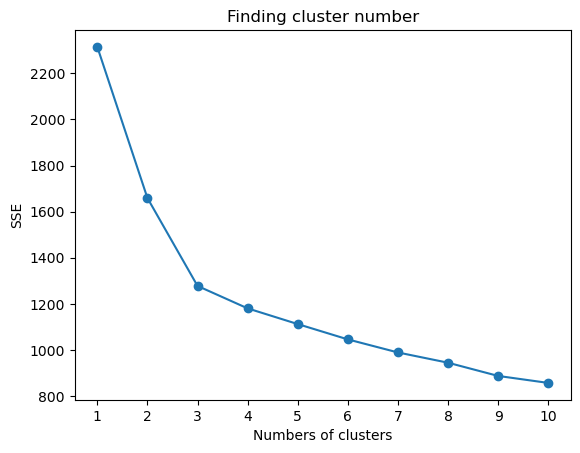

In [16]:
plt.scatter(Rng,sse)
plt.plot(Rng,sse)
plt.xlabel('Numbers of clusters')
plt.ylabel('SSE')
plt.title('Finding cluster number')
plt.xticks(Rng)

*It look like **k=3** is best for the dataset*

In [17]:
k=3
km = KMeans(n_clusters=k)
km.fit(x_scaled)
km.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)

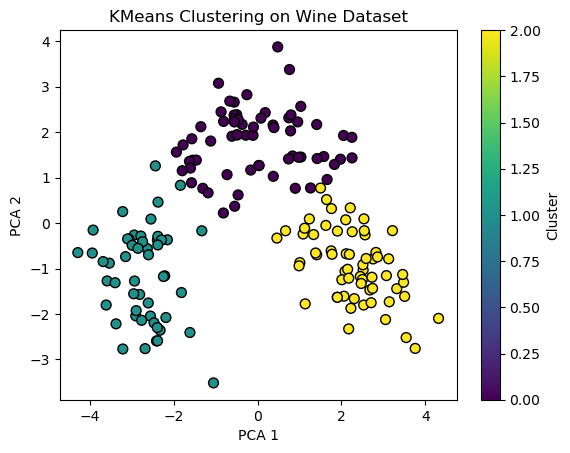

In [19]:
plt.scatter(x_pca[:,0],x_pca[:,1],c=km.labels_,cmap='viridis',edgecolors='black',s=50)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("KMeans Clustering on Wine Dataset")
plt.colorbar(label="Cluster")
plt.show()

In [20]:
df = pd.DataFrame(wine.data,columns=wine.feature_names)
df['target'] = km.labels_
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,2
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,2
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,2
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,2
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,2


### Training model

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.2)

In [23]:
from sklearn.naive_bayes import GaussianNB
model1 = GaussianNB() 

In [24]:
model1.fit(X_train, y_train)

GaussianNB()

In [25]:
model1.score(X_test, y_test)

0.9722222222222222

In [26]:
from sklearn.naive_bayes import MultinomialNB
model2 = MultinomialNB() 

In [27]:
model2.fit(X_train, y_train)

MultinomialNB()

In [28]:
model2.score(X_test, y_test)

0.9722222222222222